<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/main/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

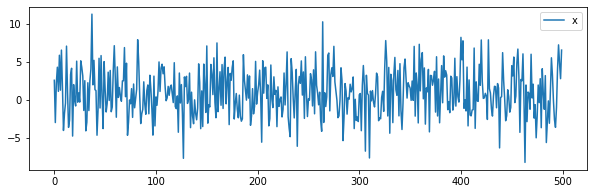

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, Normalizer

N = 500
t = np.arange(N)
x = np.random.normal(loc=1, scale=3, size=N)

plt.figure(figsize=(10,3))
plt.plot(t,x, label='x')
plt.legend()
plt.show()

# Zad 1
Wersja biblioteczna

# Zad 1
Własna implementacja

# Zad 2

# Zad 3


# Zad 4